###In this notebook I am playing with plotting complex concentration as a function of Kd. 
Comparing known ligands and known proteins with known ranges of Kd will be done. Complex concentration and fluorescence of the complex are assumed to be directly related, but issues and errors of fluorescence will also be addressed, for example the detection limit of our fluorimeter will be taken into account. At the very end, a model of competitive ligand binding will also be addressed.

In [385]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.display import display, Math, Latex
%pylab inline

Populating the interactive namespace from numpy and matplotlib


###The Simple Model

In [386]:
#display(Math(r'F(k) = \int_{-\infty}^{\infty} f(x) e^{2\pi i k} dx'))
display(Math(r' L + P \underset{k_-1}{\stackrel{k_1}{\rightleftharpoons}} PL'))

<IPython.core.display.Math object>

This is a simple model of our system.

We are assuming complex concentration [LP] is proportional to complex fluorescence (in this particular assay).

We estimate/know the Ligand [L] and Protein [P] concentration from the experimental setup.

In [387]:
display(Math(r' K_{d} = \frac{[L][P]}{[PL]}'))

<IPython.core.display.Math object>

From this relation can calculate Kd from these three values.

###Let's take a hypothetical case where Kd = 2nM. (2e-9 M)

What binding curve would we expect?

In [388]:
Kd = 2e-9

The protein concentration for our assay will be 1 nM (half of the Kd).

In [389]:
Ptot = 1e-9

The ligand concentration will be in half log dilution from 20 uM ligand.

In [390]:
Ltot = 20.0e-6 / np.array([10**(float(i)/2.0) for i in range(24)]) 

To calculate PL as a function of Ptot, Ltot, and Kd, we start with

In [391]:
display(Math(r'[PL] = \frac{[L][P]}{K_{d} }'))

<IPython.core.display.Math object>

Then we need to put L and P in terms of Ltot and Ptot, using

In [392]:
display(Math(r'[L] = [Ltot]-[PL]'))

<IPython.core.display.Math object>

In [393]:
display(Math(r'[P] = [Ptot]-[PL]'))

<IPython.core.display.Math object>

This gives us:

In [394]:
display(Math(r'[PL] = \frac{([Ltot]-[PL])([Ptot]-[PL])}{K_{d} }'))

<IPython.core.display.Math object>

Solving this for 0 you get:

In [395]:
display(Math(r'0 = [PL]^2 - [PL]([Ptot]+[Ltot]+K_{d}) + [Ptot][Ltot]'))

<IPython.core.display.Math object>

Using the quadratic equation:

In [396]:
display(Math(r'x = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}'))

<IPython.core.display.Math object>

where x is [PL], a is 1, -([Ptot]+[Ltot]+Kd) is b, and [Ptot][Ltot] is c. We get as the only reasonable solution:

In [397]:
display(Math(r'[PL] = \frac{([Ptot] + [Ltot] + K_{d}) - \sqrt{([Ptot] + [Ltot] + K_{d})^2 - 4[Ptot][Ltot]}}{2}')) 

<IPython.core.display.Math object>

In [398]:
#Now we can use this to define a function that gives us PL from Kd, Ptot, and Ltot.
def two_component_binding(Kd, Ptot, Ltot):
    """
    Parameters
    ----------
    Kd : float
        Dissociation constant
    Ptot : float
        Total protein concentration
    Ltot : float
        Total ligand concentration
        
    Returns
    -------
    P : float
        Free protein concentration
    L : float
        Free ligand concentration
    PL : float
        Complex concentration
    """
                                    
    PL = 0.5 * ((Ptot + Ltot + Kd) - np.sqrt((Ptot + Ltot + Kd)**2 - 4*Ptot*Ltot))  # complex concentration (uM)
    P = Ptot - PL; # free protein concentration in sample cell after n injections (uM)                                                                                                                                                                                                                          
    L = Ltot - PL; # free ligand concentration in sample cell after n injections (uM)                                                                                                                                                                                                                           
    return [P, L, PL]

In [399]:
[L, P, PL] = two_component_binding(Kd, Ptot, Ltot)

###Now we can plot our complex concentration as a function of our ligand concentration!

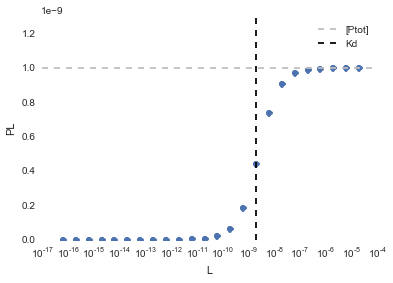

In [400]:
# y will be complex concentration
# x will be total ligand concentration
plt.semilogx(Ltot,PL, 'o')
plt.xlabel('L')
plt.ylabel('PL')
plt.ylim(0,1.3e-9)
plt.axhline(Ptot,color='0.75',linestyle='--',label='[Ptot]')
plt.axvline(Kd,color='k',linestyle='--',label='Kd')
plt.legend()

Okay, so now lets do something a little more fun.

### Let's overlap the curves we get for different amounts of protein in the assay.

In [401]:
[L2, P2, PL2] = two_component_binding(Kd, Ptot/2, Ltot)
[L3, P3, PL3] = two_component_binding(Kd, Ptot*2, Ltot)

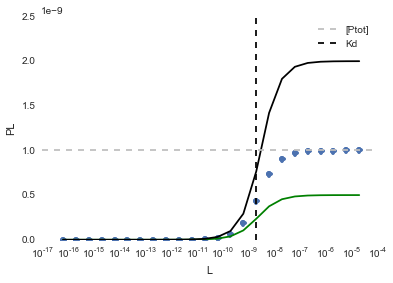

In [402]:
# y will be complex concentration
# x will be total ligand concentration
plt.semilogx(Ltot,PL,'o',Ltot,PL2,'g',Ltot,PL3,'k')
plt.xlabel('L')
plt.ylabel('PL')
plt.ylim(0,2.5e-9)
plt.axhline(Ptot,color='0.75',linestyle='--',label='[Ptot]')
#plt.axhline(Ptot/2,color='g',label='[Ptot]/2')
#plt.axhline(Ptot*2,color='k',label='[Ptot]*2')
plt.axvline(Kd,color='k',linestyle='--',label='Kd')
plt.legend()

###Let's do even more fun things!

Say we have one molecule that has a different Kd for a bunch of proteins. We'll keep the protein concentration the same, but look at how our complex concentration changes as a function of Kd.

In [410]:
[L4, P4, PL4] = two_component_binding(Kd/10, Ptot, Ltot)
[L5, P5, PL5] = two_component_binding(Kd*10, Ptot, Ltot)

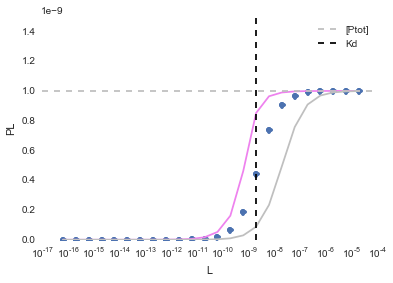

In [413]:
# y will be complex concentration
# x will be total ligand concentration
plt.semilogx(Ltot,PL,'o',Ltot,PL4,'violet',Ltot,PL5,'.75')
plt.xlabel('L')
plt.ylabel('PL')
plt.ylim(0,1.5e-9)
plt.axhline(Ptot,color='0.75',linestyle='--',label='[Ptot]')
#plt.axvline(Kd/10,color='violet',label='Kd/10')
#plt.axvline(Kd*10,color='.75',label='Kd*10')
plt.axvline(Kd,color='k',linestyle='--',label='Kd')
plt.legend()

In [ ]:
#Solubility - Pick 10 kinases and find their bosutinib affinity

In [405]:
#check matlab scripts again - can I get a continuous curve?
#check first ipython notebook

In [406]:
# Next.  Various Kd's use kinases as an example. Ideal Ligand/Protein Concentraions
# Going backwards using least squares check out John's old CADD GRC.
# Competition assays. Hille coefficent? Different models of competitive vs. non-competitive?
# Add detection thresholds, fluorescence error, and inner filter effect.